## Importing Libraries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data Preprocessing 

### Training Image Preprocessing

In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    r'C:\Users\DELL\Downloads\Project Exhibition II\extracts\Plant_Disease_Dataset\Plant_Disease_Dataset\train',  # Full path to the 'train' folder
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

print(f"Found {len(training_set.file_paths)} images belonging to {len(training_set.class_names)} classes.")


Found 70295 files belonging to 38 classes.
Found 70295 images belonging to 38 classes.


### Validation Image Preprocessing

In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    r'C:\Users\DELL\Downloads\Project Exhibition II\extracts\Plant_Disease_Dataset\Plant_Disease_Dataset\valid',  # Full directory path
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

print(f"Found {len(validation_set.file_paths)} images belonging to {len(validation_set.class_names)} classes.")


Found 17572 files belonging to 38 classes.
Found 17572 images belonging to 38 classes.


## Building Model

In [4]:
cnn = tf.keras.models.Sequential() 

### Building Convolution Layer

In [5]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [6]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [7]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [10]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [11]:
cnn.add(tf.keras.layers.Flatten())

In [12]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [13]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [14]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=38,activation='softmax'))

### Compiling and Training Phase

In [15]:
cnn.compile(optimizer=tf.keras.optimizers.legacy.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [16]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                    

In [17]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 [==============================] - 923s 398ms/step - loss: 1.4248 - accuracy: 0.5822 - val_loss: 0.4920 - val_accuracy: 0.8434
Epoch 2/10
2197/2197 [==============================] - 282s 128ms/step - loss: 0.4407 - accuracy: 0.8610 - val_loss: 0.2951 - val_accuracy: 0.9047
Epoch 3/10
2197/2197 [==============================] - 285s 130ms/step - loss: 0.2557 - accuracy: 0.9188 - val_loss: 0.1933 - val_accuracy: 0.9375
Epoch 4/10
2197/2197 [==============================] - 286s 130ms/step - loss: 0.1714 - accuracy: 0.9443 - val_loss: 0.1530 - val_accuracy: 0.9526
Epoch 5/10
2197/2197 [==============================] - 281s 128ms/step - loss: 0.1323 - accuracy: 0.9573 - val_loss: 0.1394 - val_accuracy: 0.9566
Epoch 6/10
2197/2197 [==============================] - 280s 127ms/step - loss: 0.0997 - accuracy: 0.9678 - val_loss: 0.1635 - val_accuracy: 0.9481
Epoch 7/10
2197/2197 [==============================] - 282s 128ms/step - loss: 0.0840 - accuracy: 0.9729 - val_

## Evaluating Model

In [18]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

2197/2197 [==============================] - 92s 42ms/step - loss: 0.0249 - accuracy: 0.9921
Training accuracy: 0.992104709148407


In [19]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

550/550 [==============================] - 23s 41ms/step - loss: 0.1153 - accuracy: 0.9686
Validation accuracy: 0.968643307685852


### Saving Model

In [20]:
cnn.save('trained_plant_disease_model.keras')

In [21]:
training_history.history #Return Dictionary of history

{'loss': [1.4248031377792358,
  0.4407482147216797,
  0.2556667625904083,
  0.171350359916687,
  0.13233347237110138,
  0.09967830777168274,
  0.08402119576931,
  0.06876829266548157,
  0.06339527666568756,
  0.05193452164530754],
 'accuracy': [0.5822462439537048,
  0.8610427379608154,
  0.9187850952148438,
  0.9443061351776123,
  0.9572942852973938,
  0.9678071141242981,
  0.9728999137878418,
  0.9770823121070862,
  0.979173481464386,
  0.9828295111656189],
 'val_loss': [0.4919961988925934,
  0.295101523399353,
  0.1933322548866272,
  0.15299801528453827,
  0.13937583565711975,
  0.16350820660591125,
  0.142278254032135,
  0.20002953708171844,
  0.11742251366376877,
  0.11533477902412415],
 'val_accuracy': [0.8433871865272522,
  0.9047347903251648,
  0.9374573230743408,
  0.952595055103302,
  0.9565786719322205,
  0.9480992555618286,
  0.9586842656135559,
  0.94514000415802,
  0.965740978717804,
  0.968643307685852]}

In [22]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [23]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


## Accuracy Visualization

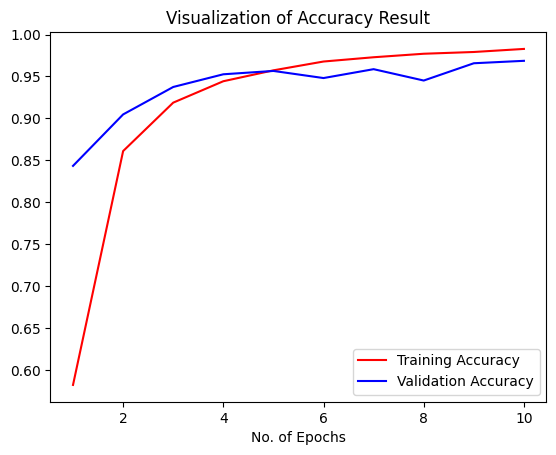

In [24]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

### Some other metrics for model evaluation

In [25]:
class_name = validation_set.class_names

In [26]:
import tensorflow as tf

test_set = tf.keras.utils.image_dataset_from_directory(
    directory=r'C:\Users\DELL\Downloads\Project Exhibition II\extracts\Plant_Disease_Dataset\Plant_Disease_Dataset\valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)


Found 17572 files belonging to 38 classes.


In [27]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

17572/17572 [==============================] - 103s 6ms/step


In [28]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [29]:
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [30]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [31]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [32]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.98      0.97      0.98       504
                                 Apple___Black_rot       0.99      0.98      0.99       497
                          Apple___Cedar_apple_rust       0.93      1.00      0.96       440
                                   Apple___healthy       0.96      0.98      0.97       502
                               Blueberry___healthy       0.98      0.97      0.98       454
          Cherry_(including_sour)___Powdery_mildew       0.99      0.98      0.99       421
                 Cherry_(including_sour)___healthy       0.98      0.99      0.99       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.95      0.91      0.93       410
                       Corn_(maize)___Common_rust_       1.00      0.98      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.92      0.98      0.

### Confusion Matrix Visualization

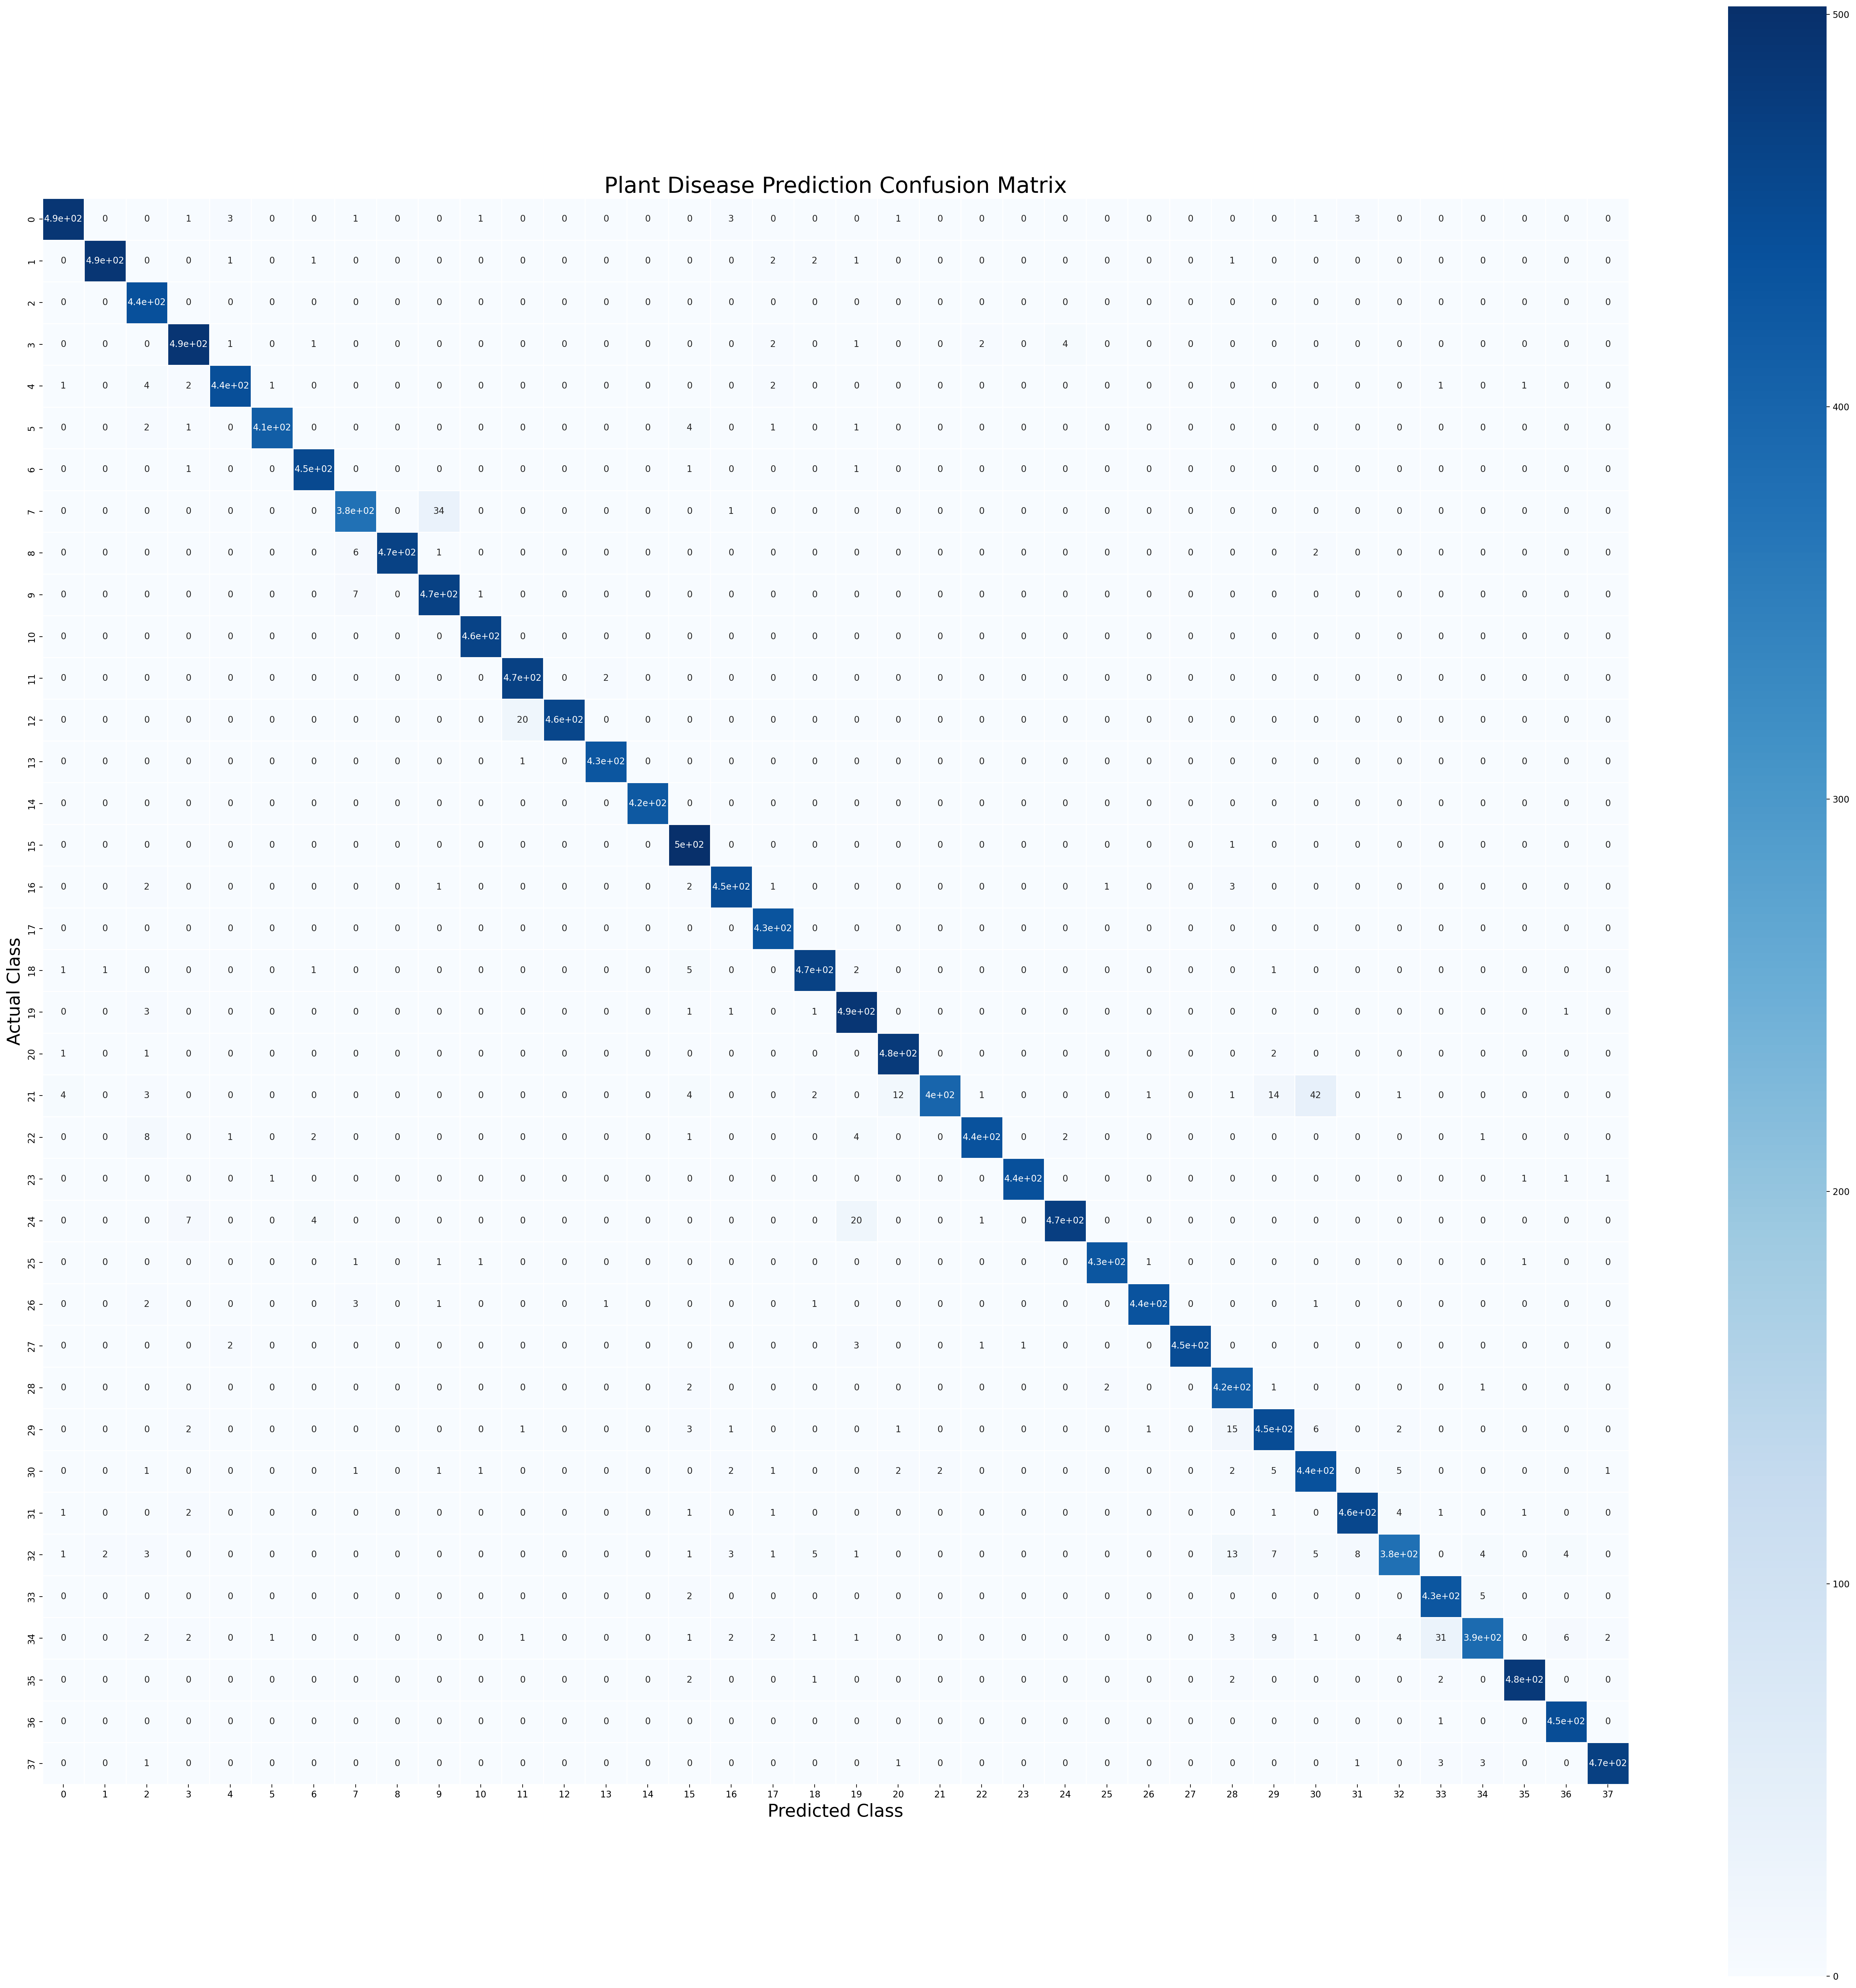

In [33]:
plt.figure(figsize=(40, 40), dpi=200)
sns.heatmap(
    cm,
    annot=True,
    annot_kws={"size": 10},
    cmap="Blues",        # Light, white-based colormap
    linewidths=0.5,      # Thin lines between cells
    linecolor='white',   # White grid lines
    square=True
)

plt.xlabel('Predicted Class', fontsize=20)
plt.ylabel('Actual Class', fontsize=20)
plt.title('Plant Disease Prediction Confusion Matrix', fontsize=25)
plt.show()
